In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from difflib import SequenceMatcher as sm
from utils.diff import diff
from utils.merge import merge

In [2]:
sea_lst = []
for y in range(1990, 2024):
    for s in ['03-31', '06-30', '09-30', '12-31']:
        sea_lst.append(f'{y}-{s}')
sea_df = pd.DataFrame(sea_lst[:-3], columns=['会计期间'])
sea_df['on'] = 0

stk_df1 = pd.read_csv('../../data/csmar/公司文件.csv')
stk_df1['on'] = 0
header1 = pd.merge(stk_df1, sea_df, on=['on'], how='left')[['证券代码', '会计期间']]

stk_df2 = pd.read_csv('../../data/tushare/股票列表.csv')
stk_df2['on'] = 0
header2 = pd.merge(stk_df2, sea_df, on=['on'], how='left')[['证券代码', '会计期间']]

stk_df3 = pd.read_csv('../../data/jqdata/所有股票数据.csv')
stk_df3['on'] = 0
header3 = pd.merge(stk_df3, sea_df, on=['on'], how='left')[['证券代码', '会计期间']]

header = pd.merge(pd.merge(header1, header2, on=['证券代码', '会计期间'], how='inner'), header3, on=['证券代码', '会计期间'], how='inner')
header

,证券代码,会计期间
0,1,1990-03-31
1,1,1990-06-30
2,1,1990-09-30
3,1,1990-12-31
4,1,1991-03-31
...,...,...
661404,689009,2022-03-31
661405,689009,2022-06-30
661406,689009,2022-09-30
661407,689009,2022-12-31


In [52]:
df10 = pd.read_csv('../../data/csmar/季_现金流量表(直接法).csv').drop(columns=['报表类型', '差错更正披露日期', '证券简称', '是否发生差错更正']).replace(0, np.nan)
df11 = pd.read_csv('../../data/csmar/季_现金流量表(间接法).csv').drop(columns=['报表类型', '差错更正披露日期', '证券简称', '是否发生差错更正', '现金及现金等价物净增加额', '经营活动产生的现金流量净额']).replace(0, np.nan)
df1 = pd.merge(df10, df11, on=['证券代码', '会计期间'], how='left')
del df10
del df11
df1['查询成功'] = np.nan
df1['查询成功'][(df1['查询成功_x'] == 1) | (df1['查询成功_y'] == 1)] = 1
df1.drop(columns=['查询成功_x', '查询成功_y'], inplace=True)
df1 = diff(df1, col=list(set(df1.columns) - {'证券代码', '会计期间', '查询成功', '现金的期末余额', '现金的期初余额', '现金等价物的期末余额', '现金等价物的期初余额', '期初现金及现金等价物余额', '期末现金及现金等价物余额'})).replace(0, np.nan)
df1 = df1.rename(columns={'处置固定资产、无形资产和其他长期资产的损失(收益以“－”号填列)': '处置固定资产、无形资产和其他长期资产的损失', '固定资产报废损失(收益以“－”号填列)': '固定资产报废损失', '公允价值变动损失(收益以“－”号填列)': '公允价值变动损失', '财务费用(收益以“－”号填列)': '财务费用', '投资损失(收益以“－”号填列)': '投资损失', '递延所得税资产减少(增加以“－”号填列)': '递延所得税资产减少', '递延所得税负债增加(减少以“－”号填列)': '递延所得税负债增加', '存货的减少(增加以“－”号填列)': '存货的减少', '经营性应收项目的减少(增加以“－”号填列)': '经营性应收项目的减少', '经营性应付项目的增加(减少以“－”号填列)': '经营性应付项目的增加', '收到的其他与经营活动有关的现金': '收到其他与经营活动有关的现金', '收到的其他与投资活动有关的现金': '收到其他与投资活动有关的现金', '其中：子公司吸收少数股东投资收到的现金': '子公司吸收少数股东投资收到的现金', '其中：子公司支付给少数股东的股利、利润': '子公司支付给少数股东的股利、利润', '现金的期末余额': '现金期末余额', '现金的期初余额': '现金期初余额', '现金等价物的期末余额': '现金等价物期末余额', '现金等价物的期初余额': '现金等价物期初余额', '期初现金及现金等价物余额': '现金及现金等价物期初余额', '期末现金及现金等价物余额': '现金及现金等价物期末余额', '存放中央银行和同业款项净增加额': '存放中央银行及同业款项净增加额', '投资活动产生的现金流入小计': '投资活动现金流入小计', '投资活动产生的现金流出小计': '投资活动现金流出小计'})
df2 = pd.read_csv('../../data/tushare/季_现金流量表.csv').rename(columns={'收到再保业务现金净额': '收到再保险业务现金净额', '处置固定、无形资产和其他长期资产的损失': '处置固定资产、无形资产和其他长期资产的损失', '其中:子公司吸收少数股东投资收到的现金': '子公司吸收少数股东投资收到的现金', '其中:子公司支付给少数股东的股利、利润': '子公司支付给少数股东的股利、利润', '未确认投资损失': '未确认的投资损失', '期初现金及现金等价物余额': '现金及现金等价物期初余额', '期末现金及现金等价物余额': '现金及现金等价物期末余额', '加:现金等价物的期末余额': '现金等价物期末余额', '减:现金等价物的期初余额': '现金等价物期初余额', '减:现金的期初余额': '现金期初余额', '现金的期末余额': '现金期末余额', '存放央行和同业款项净增加额': '存放中央银行及同业款项净增加额', '融资租入固定资产': '融资租赁固定资产', '加:资产减值准备': '资产减值准备', '保户储金净增加额': '保户储金及投资款净增加额'}).drop(columns=['TS股票代码', '公告日期', '实际公告日期', '公司类型', '报表类型', '报告期类型']).replace(0, np.nan)
df3 = pd.read_csv('../../data/jqdata/季_现金流数据.csv').rename(columns={}).drop(columns=['股票代码', '报告日期']).replace(0, np.nan)

In [53]:
s1 = df1.columns
s2 = df2.columns
similar = np.array([[sm(None, i, j).ratio() for j in s2] for i in s1])
i_, j_ = np.unravel_index(np.arange(similar.shape[0]*similar.shape[1]).reshape(similar.shape)[similar != 0][similar[similar != 0].argsort()[::-1]], similar.shape)
for i, j in zip(i_, j_):
    if s1[i] != s2[j]:
        print(s1[i], s2[j], ''.join((set(s1[i]) | set(s2[j])) - (set(s1[i]) & set(s2[j]))))

收到其他与筹资活动有关的现金 收到其他与投资活动有关的现金 筹投
收到其他与投资活动有关的现金 收到其他与筹资活动有关的现金 筹投
支付其他与投资活动有关的现金 支付其他与筹资活动有关的现金 筹投
支付其他与筹资活动有关的现金 支付其他与投资活动有关的现金 筹投
筹资活动产生的现金流量净额 投资活动产生的现金流量净额 筹投
现金及现金等价物期末余额 现金及现金等价物期初余额 末初
现金及现金等价物期初余额 现金及现金等价物期末余额 末初
筹资活动现金流出小计 筹资活动现金流入小计 出入
经营活动现金流出小计 经营活动现金流入小计 出入
投资活动现金流入小计 投资活动现金流出小计 出入
投资活动现金流入小计 筹资活动现金流入小计 筹投
投资活动现金流出小计 投资活动现金流入小计 出入
投资活动现金流出小计 筹资活动现金流出小计 筹投
经营活动现金流入小计 经营活动现金流出小计 出入
筹资活动现金流入小计 筹资活动现金流出小计 出入
筹资活动现金流入小计 投资活动现金流入小计 筹投
筹资活动现金流出小计 投资活动现金流出小计 筹投
现金等价物期初余额 现金等价物期末余额 末初
收回投资收到的现金 吸收投资收到的现金 吸回
现金等价物期末余额 现金等价物期初余额 末初
吸收投资收到的现金 收回投资收到的现金 吸回
拆入资金净增加额 拆出资金净增加额 出入
拆出资金净增加额 拆入资金净增加额 出入
投资活动现金流量净额 投资活动产生的现金流量净额 的生产
支付其他与投资活动有关的现金 支付其他与经营活动有关的现金 经投营资
现金等价物期末余额 现金及现金等价物期末余额 及
支付其他与经营活动有关的现金 收到其他与经营活动有关的现金 收付支到
支付其他与筹资活动有关的现金 支付其他与经营活动有关的现金 经筹营资
收到其他与投资活动有关的现金 支付其他与投资活动有关的现金 收付支到
现金等价物期初余额 现金及现金等价物期初余额 及
现金及现金等价物期初余额 现金等价物期初余额 及
收到其他与经营活动有关的现金 支付其他与经营活动有关的现金 收付支到
支付其他与投资活动有关的现金 收到其他与投资活动有关的现金 收付支到
收到其他与经营活动有关的现金 收到其他与投资活动有关的现金 经投营资
收到其他与投资活动有关的现金 收到其他与经营活动有关的现金 经投营资
现金及现金等价物期末余

In [55]:
c = '小计'
print([x for x in df1.columns if c in x])
print([x for x in df2.columns if c in x])
print([x for x in df3.columns if c in x])

['经营活动现金流入小计', '经营活动现金流出小计', '投资活动现金流入小计', '投资活动现金流出小计', '筹资活动现金流入小计', '筹资活动现金流出小计']
['经营活动现金流入小计', '经营活动现金流出小计', '投资活动现金流入小计', '投资活动现金流出小计', '筹资活动现金流入小计', '筹资活动现金流出小计']
['经营活动现金流入小计', '经营活动现金流出小计', '投资活动现金流入小计', '投资活动现金流出小计', '筹资活动现金流入小计', '筹资活动现金流出小计']


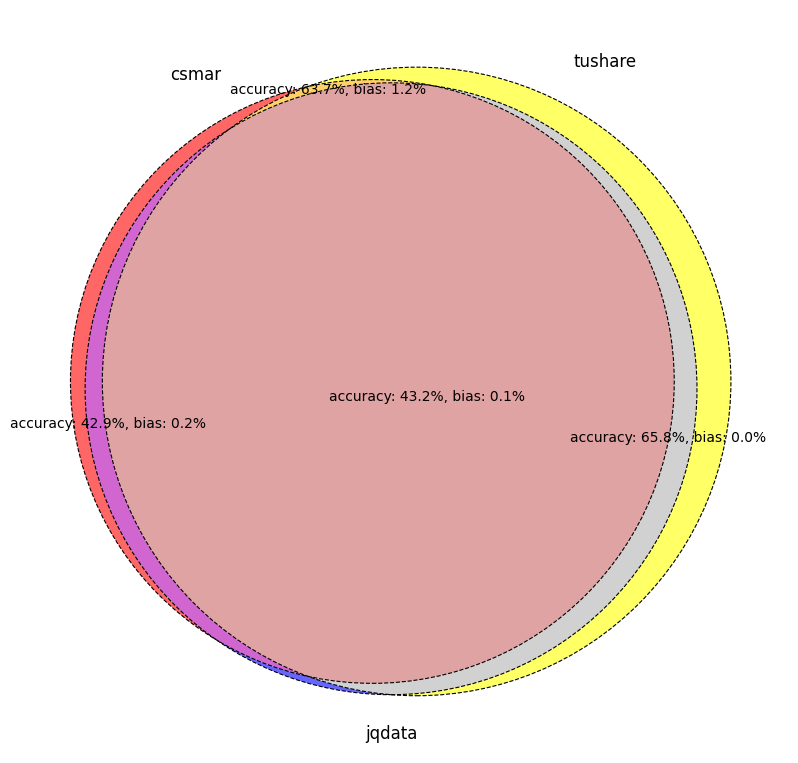

In [50]:
name = '投资活动现金流入小计'
name1 = '投资活动产生的现金流入小计'
name2 = '投资活动现金流入小计'
name3 = '投资活动现金流入小计'
if name1 not in df1.columns:
    df1[name1] = np.nan
if name2 not in df2.columns:
    df2[name2] = np.nan
if name3 not in df3.columns:
    df3[name3] = np.nan
df4 = df1.rename(columns={name1: name + '1'})[['证券代码', '会计期间', name + '1']]
df5 = df2.rename(columns={name2: name + '2'})[['证券代码', '会计期间', name + '2']]
df6 = df3.rename(columns={name3: name + '3'})[['证券代码', '会计期间', name + '3']]
df7 = pd.merge(pd.merge(pd.merge(header, df4, on=['证券代码', '会计期间'], how='left'), df5, on=['证券代码', '会计期间'], how='left'), df6, on=['证券代码', '会计期间'], how='left')
df8 = df7[['证券代码', '会计期间', name + '1', name + '2', name + '3']]
ar = np.arange(len(df8))
subsets = [set(ar[~df8[name + '1'].isna()]), set(ar[~df8[name + '2'].isna()]), set(ar[~df8[name + '3'].isna()])]
plt.figure(figsize=(10, 10))
G = venn3(subsets, set_labels=('csmar', 'tushare', 'jqdata'), alpha=0.6, set_colors=("#FF0000", "#FFFF00", "#0000FF"))
df9 = df8[(~df8[name + '1'].isna()) & (~df8[name + '2'].isna())]
df10 = df9[df9[name + '1'] != df9[name + '2']]
acc1 = (df9[name + '1'] == df9[name + '2']).mean()
bias1 = 2*(df10[name + '1'] - df10[name + '2']).abs().sum()/(df10[name + '1'].abs().sum() + df10[name + '2'].abs().sum())
try:
    G.get_label_by_id('110').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc1, 100*bias1))
    df11 = df8[(~df8[name + '1'].isna()) & (~df8[name + '3'].isna())]
    df12 = df11[df11[name + '1'] != df11[name + '3']]
    acc2 = (df11[name + '1'] == df11[name + '3']).mean()
    bias2 = 2*(df12[name + '1'] - df12[name + '3']).abs().sum()/(df12[name + '1'].abs().sum() + df12[name + '3'].abs().sum())
except:
    pass
try:
    G.get_label_by_id('101').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc2, 100*bias2))
    df13 = df8[(~df8[name + '2'].isna()) & (~df8[name + '3'].isna())]
    df14 = df13[df13[name + '2'] != df13[name + '3']]
    acc3 = (df13[name + '2'] == df13[name + '3']).mean()
    bias3 = 2*(df14[name + '2'] - df14[name + '3']).abs().sum()/(df14[name + '2'].abs().sum() + df14[name + '3'].abs().sum())
except:
    pass
try:
    G.get_label_by_id('011').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc3, 100*bias3))
    df15 = df8[(~df8[name + '1'].isna()) & (~df8[name + '2'].isna()) & (~df8[name + '3'].isna())]
    df16 = df15[~((df15[name + '1'] == df15[name + '2']) & (df15[name + '2'] == df15[name + '3']))]
    acc4 = ((df15[name + '1'] == df15[name + '2']) & (df15[name + '2'] == df15[name + '3'])).mean()
    bias4 = ((df16[name + '1'] - df16[name + '2']).abs().sum() + (df16[name + '1'] - df16[name + '3']).abs().sum() + (df16[name + '2'] - df16[name + '3']).abs().sum())/(df16[name + '1'].abs().sum() + df16[name + '2'].abs().sum() + df16[name + '3'].abs().sum())
except:
    pass
try:
    G.get_label_by_id('111').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc4, 100*bias4))
except:
    pass
try:
    G.get_label_by_id('100').set_text('')
except:
    pass
try:
    G.get_label_by_id('010').set_text('')
except:
    pass
try:
    G.get_label_by_id('001').set_text('')
except:
    pass
G = venn3_circles(subsets, linestyle='--', linewidth=0.8, color="black")
plt.show()

In [51]:
gap12 = 2*(df8[name + '1'] - df8[name + '2']).abs()/(df8[name + '1'].abs() + df8[name + '2'].abs())
gap13 = 2*(df8[name + '1'] - df8[name + '3']).abs()/(df8[name + '1'].abs() + df8[name + '3'].abs())
gap23 = 2*(df8[name + '2'] - df8[name + '3']).abs()/(df8[name + '2'].abs() + df8[name + '3'].abs())
print('gap12:', (gap12 >= 0).sum(), (gap12 > 0.01).sum(), (gap12 > 0.03).sum(), (gap12 > 0.05).sum())
print('gap13:', (gap13 >= 0).sum(), (gap13 > 0.01).sum(), (gap13 > 0.03).sum(), (gap13 > 0.05).sum())
print('gap23:', (gap23 >= 0).sum(), (gap23 > 0.01).sum(), (gap23 > 0.03).sum(), (gap23 > 0.05).sum())

gap12: 154710 763 708 674
gap13: 159148 877 819 780
gap23: 163240 121 111 104


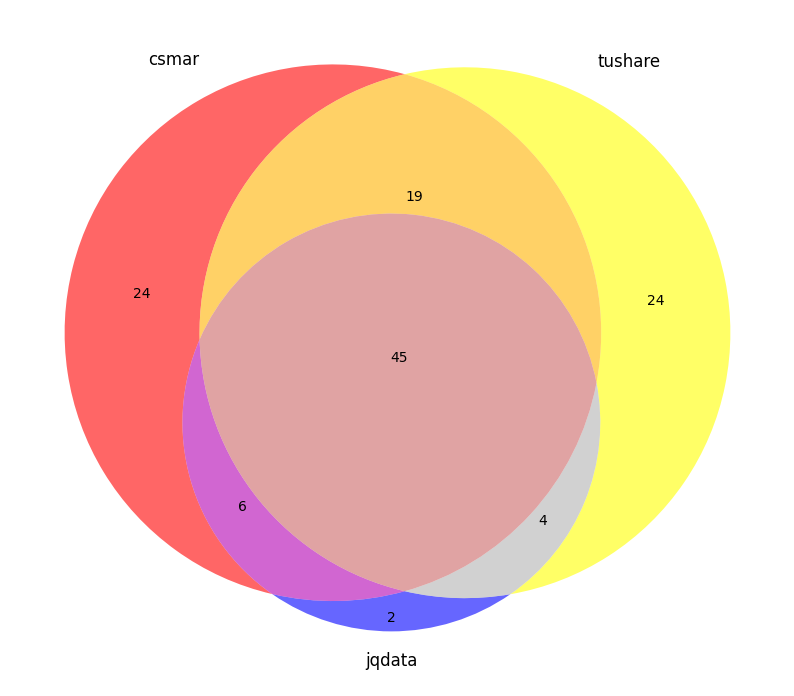

In [21]:
subsets = [set(df1.columns), set(df2.columns), set(df3.columns)]
plt.figure(figsize=(10, 10))
venn3(subsets, set_labels=('csmar', 'tushare', 'jqdata'), alpha=0.6, set_colors=("#FF0000", "#FFFF00", "#0000FF"))
plt.show()

In [142]:
col = list(set(df1.columns) & set(df2.columns) & set(df3.columns))
col.sort()
df4 = df1[col]
df5 = df2[col]
df6 = df3[col]
df4.columns = [i + '1' if i not in ['证券代码', '会计期间'] else i for i in col]
df5.columns = [i + '2' if i not in ['证券代码', '会计期间'] else i for i in col]
df6.columns = [i + '3' if i not in ['证券代码', '会计期间'] else i for i in col]
col.remove('证券代码')
col.remove('会计期间')
col.remove('查询成功')

In [143]:
df7 = pd.merge(pd.merge(pd.merge(header, df4, on=['证券代码', '会计期间'], how='left'), df5, on=['证券代码', '会计期间'], how='left'), df6, on=['证券代码', '会计期间'], how='left')
df7

,证券代码,会计期间,保单红利支出1,公允价值变动收益1,其他综合收益1,净利润1,分保费用1,利息支出1,利息收入1,利润总额1,...,营业总成本3,营业总收入3,营业成本3,营业收入3,营业税金及附加3,财务费用3,资产减值损失3,退保金3,销售费用3,非流动资产处置净损失3
0,1,1990-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1990-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1990-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1990-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1991-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661404,689009,2022-03-31,NaN,3.118724e+06,-3794445.32,3.793527e+07,NaN,NaN,NaN,7.554774e+07,...,1.863121e+09,1.917320e+09,1.495087e+09,1.917320e+09,4760040.10,1.838356e+07,-6.327290e+05,NaN,1.065318e+08,NaN
661405,689009,2022-06-30,NaN,-4.848557e+06,7034429.90,2.173315e+08,NaN,NaN,NaN,2.737175e+08,...,2.573851e+09,2.903166e+09,2.127758e+09,2.903166e+09,8440778.85,-7.069194e+07,4.671794e+07,NaN,2.095315e+08,NaN
661406,689009,2022-09-30,NaN,-2.187029e+07,1043325.15,1.378179e+08,NaN,NaN,NaN,1.828479e+08,...,2.584274e+09,2.811668e+09,2.084140e+09,2.811668e+09,9571288.96,-1.104621e+08,7.410957e+07,NaN,2.777325e+08,NaN
661407,689009,2022-12-31,NaN,1.025141e+08,44192860.55,5.551876e+07,NaN,NaN,NaN,3.082374e+07,...,2.453002e+09,2.492164e+09,1.787582e+09,2.492164e+09,19266840.76,-8.415809e+06,1.519371e+08,NaN,3.315725e+08,NaN


In [ ]:
for i in range(len(col)):
    df8 = df7[['证券代码', '会计期间', col[i] + '1', col[i] + '2', col[i] + '3']]
    ar = np.arange(len(df8))
    subsets = [set(ar[~df8[col[i] + '1'].isna()]), set(ar[~df8[col[i] + '2'].isna()]), set(ar[~df8[col[i] + '3'].isna()])]
    plt.figure(figsize=(5, 5))
    G = venn3(subsets, set_labels=('csmar', 'tushare', 'jqdata'), alpha=0.6, set_colors=("#FF0000", "#FFFF00", "#0000FF"))
    df9 = df8[(~df8[col[i] + '1'].isna()) & (~df8[col[i] + '2'].isna())]
    df10 = df9[df9[col[i] + '1'] != df9[col[i] + '2']]
    acc1 = (df9[col[i] + '1'] == df9[col[i] + '2']).mean()
    bias1 = 2*(df10[col[i] + '1'] - df10[col[i] + '2']).abs().sum()/(df10[col[i] + '1'].abs().sum() + df10[col[i] + '2'].abs().sum())
    try:
        G.get_label_by_id('110').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc1, 100*bias1))
        df11 = df8[(~df8[col[i] + '1'].isna()) & (~df8[col[i] + '3'].isna())]
        df12 = df11[df11[col[i] + '1'] != df11[col[i] + '3']]
        acc2 = (df11[col[i] + '1'] == df11[col[i] + '3']).mean()
        bias2 = 2*(df12[col[i] + '1'] - df12[col[i] + '3']).abs().sum()/(df12[col[i] + '1'].abs().sum() + df12[col[i] + '3'].abs().sum())
    except:
        pass
    try:
        G.get_label_by_id('101').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc2, 100*bias2))
        df13 = df8[(~df8[col[i] + '2'].isna()) & (~df8[col[i] + '3'].isna())]
        df14 = df13[df13[col[i] + '2'] != df13[col[i] + '3']]
        acc3 = (df13[col[i] + '2'] == df13[col[i] + '3']).mean()
        bias3 = 2*(df14[col[i] + '2'] - df14[col[i] + '3']).abs().sum()/(df14[col[i] + '2'].abs().sum() + df14[col[i] + '3'].abs().sum())
    except:
        pass
    try:
        G.get_label_by_id('011').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc3, 100*bias3))
        df15 = df8[(~df8[col[i] + '1'].isna()) & (~df8[col[i] + '2'].isna()) & (~df8[col[i] + '3'].isna())]
        df16 = df15[~((df15[col[i] + '1'] == df15[col[i] + '2']) & (df15[col[i] + '2'] == df15[col[i] + '3']))]
        acc4 = ((df15[col[i] + '1'] == df15[col[i] + '2']) & (df15[col[i] + '2'] == df15[col[i] + '3'])).mean()
        bias4 = ((df16[col[i] + '1'] - df16[col[i] + '2']).abs().sum() + (df16[col[i] + '1'] - df16[col[i] + '3']).abs().sum() + (df16[col[i] + '2'] - df16[col[i] + '3']).abs().sum())/(df16[col[i] + '1'].abs().sum() + df16[col[i] + '2'].abs().sum() + df16[col[i] + '3'].abs().sum())
    except:
        pass
    try:
        G.get_label_by_id('111').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc4, 100*bias4))
    except:
        pass
    try:
        G.get_label_by_id('100').set_text('')
    except:
        pass
    try:
        G.get_label_by_id('010').set_text('')
    except:
        pass
    try:
        G.get_label_by_id('001').set_text('')
    except:
        pass
    G = venn3_circles(subsets, linestyle='--', linewidth=0.8, color="black")
    print(i, col[i])
    plt.show()